# Connect to Dremio (use this as a template)

You'll need to enter your credentials. They will not be stored.

In [ ]:
################################################
#              Connect to Dremio               #
################################################
# Don't edit this
from os import getenv
from getpass import getpass
import pyodbc
import pandas as pd

host = 'dremio-client.dremio.svc.cluster.local'
port = 31010
driver = getenv('DREMIO_DRIVER')

cnxn = pyodbc.connect(';'.join([
    f"Driver={driver}", 
    "ConnectionType=Direct;",
    f"HOST={host}",
    f"PORT={port}",
    "AuthenticationType=Plain",
    "UID={}".format(getpass('Dremio Username: ')),
    "PWD={}".format(getpass('Dremio Password: '))]),
    autocommit=True
)

print("Connected.")

## An overview of what's available

In [44]:
print("Catalogs:")
sql = """SELECT * FROM INFORMATION_SCHEMA.CATALOGS LIMIT 5"""
pd.read_sql(sql,cnxn)

Catalogs:


,CATALOG_NAME,CATALOG_DESCRIPTION,CATALOG_CONNECT
0,DREMIO,The internal metadata used by Dremio,


In [45]:
print("Tables:")
sql = '''SELECT * FROM INFORMATION_SCHEMA."TABLES" LIMIT 5'''
pd.read_sql(sql,cnxn)

Tables:


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,DREMIO,@christian.ritter,bank,TABLE
1,DREMIO,@data-administrator,melb_data,TABLE
2,DREMIO,christian's space,test12,VIEW
3,DREMIO,INFORMATION_SCHEMA,CATALOGS,SYSTEM_TABLE
4,DREMIO,INFORMATION_SCHEMA,COLUMNS,SYSTEM_TABLE


In [46]:
print("Columns:")
sql = """SELECT * FROM INFORMATION_SCHEMA.COLUMNS LIMIT 5"""
pd.read_sql(sql,cnxn)

Columns:


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,COLUMN_NAME,ORDINAL_POSITION,COLUMN_DEFAULT,IS_NULLABLE,DATA_TYPE,COLUMN_SIZE,CHARACTER_MAXIMUM_LENGTH,CHARACTER_OCTET_LENGTH,NUMERIC_PRECISION,NUMERIC_PRECISION_RADIX,NUMERIC_SCALE,DATETIME_PRECISION,INTERVAL_TYPE,INTERVAL_PRECISION
0,DREMIO,@christian.ritter,bank,A,1,None,YES,CHARACTER VARYING,65536,65536,262144,None,None,None,None,None,None
1,DREMIO,@christian.ritter,bank,B,2,None,YES,CHARACTER VARYING,65536,65536,262144,None,None,None,None,None,None
2,DREMIO,@christian.ritter,bank,C,3,None,YES,CHARACTER VARYING,65536,65536,262144,None,None,None,None,None,None
3,DREMIO,@christian.ritter,bank,D,4,None,YES,CHARACTER VARYING,65536,65536,262144,None,None,None,None,None,None
4,DREMIO,@christian.ritter,bank,E,5,None,YES,CHARACTER VARYING,65536,65536,262144,None,None,None,None,None,None


In [ ]:
# For more commands, see the SQL Reference
# https://docs.dremio.com/sql-reference/

################################################
#           End of Connect to Dremio           #
################################################

# Get started with your analysis!

In [16]:
sql = '''SELECT * FROM dremiosharedstorage.shared."12100121_Metadata.csv" '''
pd.read_sql(sql,cnxn)

sql = '''SELECT * FROM dremiosharedstorage.shared."12100121.csv" LIMIT 10'''
df = pd.read_sql(sql,cnxn)

In [22]:
df

,REF_DATE,GEO,DGUID,Trade,Basis,Seasonal adjustment,North American Product Classification System (NAPCS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Total of all merchandise,Dollars,81,millions,6,v1001826194,1.1.1.1.1,12417.8,,,,1
2,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,"Farm, fishing and intermediate food products [...",Dollars,81,millions,6,v1001826195,1.1.1.1.2,432.9,,,,1
3,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Farm and fishing products [C111],Dollars,81,millions,6,v1001826196,1.1.1.1.3,391.7,,,,1
4,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Live animals [111],Dollars,81,millions,6,v1001826197,1.1.1.1.4,11.9,,,,1
5,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Wheat [112],Dollars,81,millions,6,v1001826198,1.1.1.1.5,0.0,,,,1
6,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Canola (including rapeseed) [113],Dollars,81,millions,6,v1001826199,1.1.1.1.6,0.0,,,,1
7,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,"Fresh fruit, nuts and vegetables, and pulse cr...",Dollars,81,millions,6,v1001826200,1.1.1.1.7,192.3,,,,1
8,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Other crop products [115],Dollars,81,millions,6,v1001826201,1.1.1.1.8,87.7,,,,1
9,1988-01,Canada,2016A000011124,Import,Customs,Unadjusted,Other animal products [116],Dollars,81,millions,6,v1001826202,1.1.1.1.9,45.9,,,,1


In [20]:
# df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [25]:
import numpy as np

In [40]:
values = pd.to_numeric(df['VALUE'])
df['VALUE'] = values

In [36]:
values.std()

4094.1756262538506

In [37]:
values.mean()

1508.911111111111

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac85555a90>]],
      dtype=object)

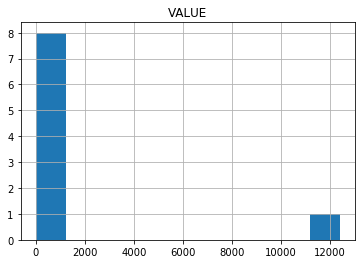

In [42]:
pd.DataFrame.hist(df)

In [43]:
values

1    12417.8
2      432.9
3      391.7
4       11.9
5        0.0
6        0.0
7      192.3
8       87.7
9       45.9
Name: VALUE, dtype: float64